In [14]:
# import pandas module 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
    
# making dataframe 
salary = pd.read_csv('./desktop/salary_data_states.csv') 
   
# output the dataframe
print(salary)

               CASE_NUMBER          CASE_STATUS CASE_RECEIVED_DATE  \
0       I-200-14073-248840               denied          3/14/2014   
1            A-15061-55212               denied          3/19/2015   
2       I-200-13256-001092               denied          9/13/2013   
3       I-200-14087-353657               denied          3/28/2014   
4       I-203-14259-128844               denied          9/16/2014   
...                    ...                  ...                ...   
167273  I-200-12241-209885  certified-withdrawn          8/28/2012   
167274  I-200-11305-143547               denied          11/1/2011   
167275  I-200-11313-833007            certified          11/9/2011   
167276  I-200-11312-798611               denied          11/8/2011   
167277  I-200-11297-523711               denied         10/24/2011   

       DECISION_DATE                                      EMPLOYER_NAME  \
0          3/21/2014                ADVANCED TECHNOLOGY GROUP USA, INC.   
1        

In [9]:
#unique list of Countries that Employees submit their Visa Application From
salary.COUNTRY_OF_CITIZENSHIP.unique()

array(['Unknown', 'IRAN', 'INDIA', 'FRANCE', 'JAPAN', 'TURKEY', 'CHINA',
       'CHILE', 'AUSTRALIA', 'LEBANON', 'CANADA', 'GERMANY', 'SYRIA',
       'PHILIPPINES', 'ISRAEL', 'SINGAPORE', 'ARGENTINA', 'HONG KONG',
       'MALAYSIA', 'RUSSIA', 'UNITED KINGDOM', 'ROMANIA', 'EGYPT',
       'NEW ZEALAND', 'SOUTH KOREA', 'PAKISTAN', 'NORWAY', 'POLAND',
       'KUWAIT', 'IRELAND', 'MEXICO', 'TAIWAN', 'BULGARIA', 'BRAZIL',
       'ARMENIA', 'BELARUS', 'COLOMBIA', 'GUATEMALA', 'THAILAND',
       'VENEZUELA', 'DENMARK', 'SPAIN', 'NEPAL', 'JORDAN', 'PERU',
       'UKRAINE', 'HUNGARY', 'BANGLADESH', 'SWEDEN', 'COSTA RICA',
       'GREECE', 'SRI LANKA', 'SOUTH AFRICA', 'BELGIUM', 'PALESTINE',
       'PORTUGAL', 'MONTENEGRO', 'SWITZERLAND', 'INDONESIA',
       'CZECH REPUBLIC', 'AZERBAIJAN', 'CAMEROON', 'SAUDI ARABIA',
       'UZBEKISTAN', 'ITALY', 'AUSTRIA', 'KENYA', 'NETHERLANDS',
       'VIETNAM', 'ECUADOR', 'ESTONIA', 'UNITED STATES OF AMERICA',
       'GEORGIA', 'SERBIA', 'NIGERIA', 'CROATIA',

In [87]:
#added "unknown" to n/a value cells  for Country_of Citizen Attribute
salary['COUNTRY_OF_CITIZENSHIP'] = salary['COUNTRY_OF_CITIZENSHIP'].fillna("Unknown")

In [85]:
#Max Salary paid by Country > Visa Class
salary.groupby(['COUNTRY_OF_CITIZENSHIP','VISA_CLASS'])['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

COUNTRY_OF_CITIZENSHIP  VISA_CLASS    
Unknown                 E-3 Australian    2500000.0
                        H-1B              2400000.0
INDIA                   greencard          746323.0
CANADA                  greencard          500000.0
AUSTRALIA               greencard          450000.0
                                            ...    
GUYANA                  greencard           45530.0
BARBADOS                greencard           45530.0
COTE d'IVOIRE           greencard           43030.0
ALGERIA                 greencard           41610.0
BAHAMAS                 greencard           38000.0
Name: PAID_WAGE_PER_YEAR, Length: 138, dtype: float64

In [88]:
#Mean Salary paid by Country > Visa Class
salary.groupby(['COUNTRY_OF_CITIZENSHIP', 'VISA_CLASS'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

COUNTRY_OF_CITIZENSHIP            VISA_CLASS
SYRIA                             greencard     178755.625000
ESTONIA                           greencard     163480.000000
LIBYA                             greencard     161540.000000
KUWAIT                            greencard     148803.000000
LEBANON                           greencard     138500.888889
                                                    ...      
TOGO                              greencard      44694.000000
COTE d'IVOIRE                     greencard      43030.000000
ALGERIA                           greencard      41610.000000
SAINT VINCENT AND THE GRENADINES  greencard      38334.000000
BAHAMAS                           greencard      38000.000000
Name: PAID_WAGE_PER_YEAR, Length: 138, dtype: float64

In [89]:
#Min Salary paid by Country > Visa Class
salary.groupby(['COUNTRY_OF_CITIZENSHIP','VISA_CLASS'])['PAID_WAGE_PER_YEAR'].min().sort_values(ascending=False)

COUNTRY_OF_CITIZENSHIP  VISA_CLASS    
ESTONIA                 greencard         163480.0
KUWAIT                  greencard         148803.0
GEORGIA                 greencard         120800.0
MONTENEGRO              greencard         120000.0
BERMUDA                 greencard         115000.0
                                            ...   
PERU                    greencard          20190.0
RUSSIA                  greencard          18960.0
SOUTH KOREA             greencard          18510.0
Unknown                 E-3 Australian     12000.0
                        H-1B               10500.0
Name: PAID_WAGE_PER_YEAR, Length: 138, dtype: float64

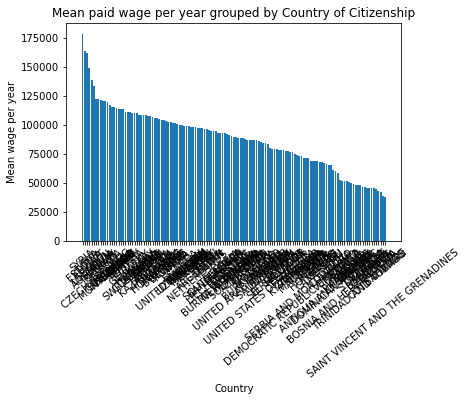

In [62]:
#mean paid wage per year grouped by Country of Citizenship of state
graph = pd.DataFrame(salary.groupby(['COUNTRY_OF_CITIZENSHIP'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
graph = graph.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='COUNTRY_OF_CITIZENSHIP', height='PAID_WAGE_PER_YEAR', data=graph)
plt.xticks(rotation=40)
plt.title('Mean paid wage per year grouped by Country of Citizenship')
plt.xlabel('Country')
plt.ylabel('Mean wage per year')
plt.savefig('wage_country.png', bbox_inches='tight', dpi=1300)

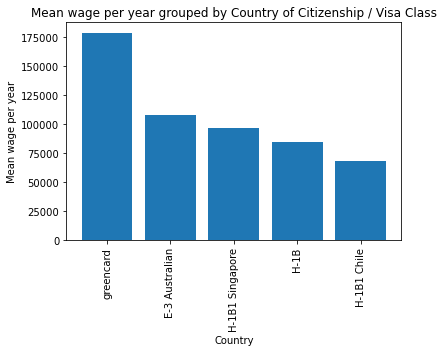

In [107]:
#mean paid wage per year grouped by COUNTRY OF CITIZENSHIP
dfg = pd.DataFrame(salary.groupby(['COUNTRY_OF_CITIZENSHIP','VISA_CLASS'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
dfg = dfg.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='VISA_CLASS', height='PAID_WAGE_PER_YEAR', data=dfg)
plt.xticks(rotation=90)
plt.title('Mean wage per year grouped by Country of Citizenship / Visa Class')
plt.xlabel('Country')
plt.ylabel('Mean wage per year')
plt.savefig('wage_country.png', bbox_inches='tight', dpi=1200)

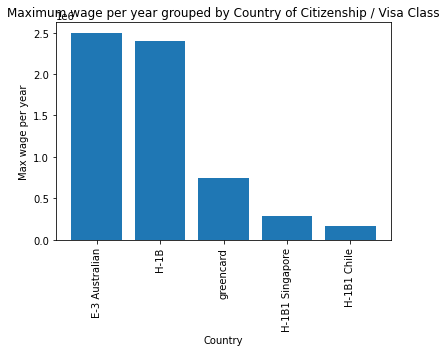

In [109]:
#MAX paid wage per year grouped by COUNTRY OF CITIZENSHIP
dfg = pd.DataFrame(salary.groupby(['COUNTRY_OF_CITIZENSHIP','VISA_CLASS'])['PAID_WAGE_PER_YEAR'].max()).reset_index()
dfg = dfg.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='VISA_CLASS', height='PAID_WAGE_PER_YEAR', data=dfg)
plt.xticks(rotation=90)
plt.title('Maximum wage per year grouped by Country of Citizenship / Visa Class')
plt.xlabel('Country')
plt.ylabel('Max wage per year')
plt.savefig('wage_country.png', bbox_inches='tight', dpi=1200)

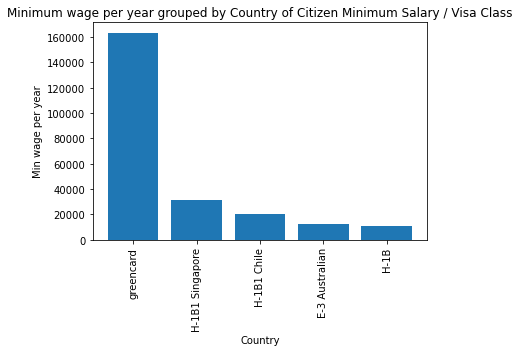

In [105]:
#Minimum paid wage per year grouped by COUNTRY OF CITIZENSHIP
dfg = pd.DataFrame(salary.groupby(['COUNTRY_OF_CITIZENSHIP','VISA_CLASS'])['PAID_WAGE_PER_YEAR'].min()).reset_index()
dfg = dfg.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='VISA_CLASS', height='PAID_WAGE_PER_YEAR', data=dfg)
plt.xticks(rotation=90)
plt.title('Minimum wage per year grouped by Country of Citizen Minimum Salary / Visa Class')
plt.xlabel('Country')
plt.ylabel('Min wage per year')
plt.savefig('wage_country.png', bbox_inches='tight', dpi=1200)

In [80]:
#Top 5 Countries of Citizenship with highest Mean Wage (1 of 5)
salary[salary["COUNTRY_OF_CITIZENSHIP"] == "SYRIA"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
361,A-14183-84629,certified,8/15/2014,1/2/2015,ALBANY MEDICAL COLLEGE,Assistant Professor,Albany,Other,medicine,n,...,"Physicians and Surgeons, All Other",New York,NY,12208.0,n,greencard,172760.0,220000.0,assistant professor,362
8565,A-14167-78619,certified,12/2/2014,6/10/2015,TEMPLE UNIVERSITY,Assistant Professor - Hepatology,Philadelphia,Other,medicine,n,...,"Physicians and Surgeons, All Other",Pennsylvania,PA,19140.0,n,greencard,117147.0,225000.0,assistant professor,8603
50986,A-14168-79295,withdrawn,7/7/2014,10/9/2014,INDIANA UNIVERSITY,Assistant Professor of Clinical Medicine & Sta...,Indianapolis,Other,medicine,n,...,"Physicians and Surgeons, All Other",Indiana,IN,46202.0,n,greencard,85490.0,200000.0,assistant professor,51069
59872,A-14114-63532,certified-expired,5/6/2014,10/16/2014,UNIVERSITY OF WISCONSIN-MADISON,Clinical Assistant Professor/Rheumatologist,Madison,Other,medicine,n,...,"Physicians and Surgeons, All Other",Wisconsin,WI,53715.0,n,greencard,80897.0,195000.0,assistant professor,59955
61530,A-14272-11009,withdrawn,10/15/2014,12/9/2014,servotech engineering,Senior Electronics and Software Engineer,Plymouth,Master's,computer and/or electrical engineering,n,...,"Software Developers, Applications",Michigan,MI,48170.0,n,greencard,80163.0,80163.0,software engineer,61613
64476,A-14213-94661,certified,8/22/2014,1/13/2015,DASSAULT SYSTEMES AMERICAS CORP.,Software Engineer,Long Beach,Master's,computer science or electrical engineering,y,...,"Software Developers, Applications",California,CA,90802.0,n,greencard,78562.0,78562.0,software engineer,64559
108164,A-14237-00977,certified,9/4/2014,1/29/2015,THE OHIO STATE UNIVERSITY,Assistant Professor Clinical,Columbus,Other,medicine,n,...,"Physicians and Surgeons, All Other",Ohio,OH,43210.0,n,greencard,61703.0,300000.0,assistant professor,108248
119583,A-14273-11745,certified,10/10/2014,3/5/2015,THE JOHNS HOPKINS UNIVERSITY,Assistant Professor of Medicine,Baltimore,Other,medicine,n,...,"Internists, General",Maryland,MD,21224.0,n,greencard,58550.0,131320.0,assistant professor,119667


In [81]:
#Top 5 Countries of Citizenship with highest Mean Wage (2 of 5)
salary[salary["COUNTRY_OF_CITIZENSHIP"] == "ESTONIA"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
15109,A-14282-14457,certified,10/13/2014,3/6/2015,GOOGLE INC.,Software Engineer,Mountain View,Master's,"computer science, information systems, or a re...",y,...,"Software Developers, Systems Software",California,CA,94043.0,n,greencard,110094.0,163480.0,software engineer,15165


In [82]:
#Top 5 Countries of Citizenship with highest Mean Wage (3 of 5)
salary[salary["COUNTRY_OF_CITIZENSHIP"] == "LIBYA"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
42370,A-13212-84381,certified,8/26/2013,4/6/2015,"COMCAST CABLE COMMUNICATIONS, LLC",Senior Software Engineer,Englewood,Bachelor's,"computer science, engineering, or a related te...",n,...,"Software Developers, Applications",Colorado,CO,80112.0,n,greencard,90200.0,90200.0,software engineer,42452
49538,A-14197-88943,certified,11/14/2014,4/20/2015,TEMPLE UNIVERSITY,Assistant Professor - Academic Hospitalist,Philadelphia,Other,medicine,n,...,"Internists, General",Pennsylvania,PA,19140.0,n,greencard,86643.0,182500.0,assistant professor,49620
49539,A-14197-88951,certified,11/14/2014,4/20/2015,TEMPLE UNIVERSITY,Assistant Professor - Academic Hospitalist,Philadelphia,Other,medicine,n,...,"Internists, General",Pennsylvania,PA,19140.0,n,greencard,86643.0,182500.0,assistant professor,49621
59311,A-14317-25337,certified,11/21/2014,5/15/2015,UNIVERSITY OF KENTUCKY,Assistant Professor of Medicine,Lexington,Other,medicine,n,...,"Physicians and Surgeons, All Other",Kentucky,KY,40536.0,n,greencard,81137.0,243500.0,assistant professor,59394
124389,A-14107-61359,certified-expired,5/1/2014,10/10/2014,SOUTHERN ILLINOIS UNIVERSITY EDWARDSVILLE,Assistant Professor of Dental Medicine,Alton,Other,dentistry,n,...,"Dentists, General",Illinois,IL,62002.0,n,greencard,57247.0,109000.0,assistant professor,124473


In [83]:
#Top 5 Countries of Citizenship with highest Mean Wage (4 of 5)
salary[salary["COUNTRY_OF_CITIZENSHIP"] == "KUWAIT"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
1190,A-14343-32606,withdrawn,1/5/2015,1/5/2015,APPLE INC.,"Software Engineer, Applications",Cupertino,Bachelor's,"comp sci, comp eng, software eng or related field",n,...,"Software Developers, Systems Software",California,CA,95014.0,n,greencard,148803.0,148803.0,software engineer,1191


In [84]:
#Top 5 Countries of Citizenship with highest Mean Wage (5 of 5)
salary[salary["COUNTRY_OF_CITIZENSHIP"] == "LEBANON"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
254,A-14289-16288,certified,10/21/2014,3/19/2015,UNIVERSITY OF FLORIDA,Clinical Assistant Professor,Jacksonville,Other,medicine,n,...,"Health Specialties Teachers, Postsecondary",Florida,FL,32209.0,n,greencard,188793.0,250000.0,assistant professor,255
22502,A-13122-60965,denied,5/2/2013,10/16/2014,UNIVERSITY OF VIRGINIA,Assistant Professor of Neurology,Charlottesville,Other,medicine,n,...,"Physicians and Surgeons, All Other",Virginia,VA,22908.0,n,greencard,102640.0,260000.0,assistant professor,22564
24463,A-14058-46123,certified-expired,2/27/2014,10/8/2014,SOUTHERN ILLINOIS UNIVERSITY SCHOOL OF MEDICINE,Assistant Professor of Obstetrics & Gynecology,Springfield,Other,obstetrics,n,...,Obstetricians and Gynecologists,Illinois,IL,62702.0,n,greencard,100900.0,380000.0,assistant professor,24525
25715,A-14307-21965,certified,11/16/2014,5/4/2015,INTEL CORPORATION,Software Engineer,Hillsboro,Doctorate,"elec&comp/elect &/or comp engr, or scie, or re...",n,...,"Software Developers, Systems Software",Oregon,OR,97124.0,n,greencard,99653.0,104000.0,software engineer,25777
38550,A-13156-69175,certified,6/25/2013,2/5/2015,"FACEBOOK, INC.",Software Engineer,Menlo Park,Master's,"comp sci, comp sw, comp eng, applied sci, math...",n,...,"Software Developers, Applications",California,CA,94025.0,n,greencard,92789.0,97858.0,software engineer,38632
43236,A-14245-03104,withdrawn,11/13/2014,12/23/2014,"VT, IDIRECT, INC",Software Engineer - Protocol & Core,Herndon,Master's,"comp. sci., elec. eng., math or closely related",n,...,"Software Developers, Applications",Virginia,VA,20171.0,n,greencard,89669.0,89669.0,software engineer,43318
50311,A-14099-59224,certified-expired,6/4/2014,10/28/2014,UNIVERSITY OF IOWA,"Clinical Assistant Professor, Obstetrics and G...",Iowa City,Other,medicine,n,...,"Health Specialties Teachers, Postsecondary",Iowa,IA,52242.0,n,greencard,86160.0,250000.0,assistant professor,50393
53039,A-14010-31650,withdrawn,1/31/2014,12/18/2014,INTEL CORPORATION,Software Engineer,Austin,Master's,"elec. &/or comp. eng., or scie., or related sc...",n,...,"Software Developers, Systems Software",Texas,TX,78746.0,n,greencard,84739.0,84739.0,software engineer,53122
53139,A-15084-61661,withdrawn,4/22/2015,4/23/2015,INDIANA UNIVERSITY,Assistant Professor,South Bend,Doctorate,management information systems or closely rela...,n,...,"Business Teachers, Postsecondary",Indiana,IN,46634.0,n,greencard,84633.0,95000.0,assistant professor,53222
85582,A-14127-67212,certified-expired,5/20/2014,10/20/2014,UNIVERSITY OF RHODE ISLAND,"Assistant Professor, Islamic Religion and Poli...",Kingston,Doctorate,"religious studies, near-eastern studies or rel...",n,...,"Philosophy and Religion Teachers, Postsecondary",Rhode Island,RI,2881.0,n,greencard,70000.0,70000.0,assistant professor,85666


In [101]:
#Top Earning COUNTRY_OF_CITIZENSHIP > Visa Class (Non Green Card Holder)
salary[salary["VISA_CLASS"] == "E-3 Australian"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,SENIOR SOFTWARE ENGINEER,PORTLAND,None,Nothing,n,...,"Software Developers, Systems Software",Oregon,OR,Unknown,y,E-3 Australian,0.0,170000.0,software engineer,5
75,I-203-13325-889631,certified,11/21/2013,11/27/2013,NEW YORK UNIVERSITY,ADJUNCT ASSISTANT PROFESSOR,NEW YORK,None,Nothing,n,...,"Postsecondary Teachers, All Other",New York,NY,Unknown,n,E-3 Australian,250640.0,112788.0,assistant professor,76
94,I-203-14043-770403,certified,2/19/2014,2/25/2014,JONES DAY,ASSOCIATE ATTORNEY,PALO ALTO,None,Nothing,n,...,Lawyers,California,CA,Unknown,y,E-3 Australian,224536.0,235000.0,attorney,95
121,I-203-14227-436034,certified,8/15/2014,8/24/2014,BRACEWELL & GIULIANI LLP,ASSOCIATE ATTORNEY,NEW YORK,None,Nothing,n,...,Lawyers,New York,NY,Unknown,y,E-3 Australian,207293.0,290000.0,attorney,122
128,I-203-14307-410538,certified,11/3/2014,11/7/2014,WHITE & CASE LLP,ASSOCIATE ATTORNEY,NEW YORK,None,Nothing,n,...,LAWYERS,New York,NY,10036,y,E-3 Australian,207293.0,250000.0,attorney,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166971,I-203-12352-723226,certified,12/17/2012,12/21/2012,"JIMBO GYMNASTICS, INC",TEACHER,SCARSDALE,None,Nothing,n,...,Teacher Assistants,New York,NY,Unknown,y,E-3 Australian,20090.0,24960.0,teacher,167055
166973,I-203-13291-409736,denied,10/18/2013,10/29/2013,PROFESSIONAL RACQUET ORGANIZATION SPORTS CLUB,LIFESTYLE AND WEIGHT MANAGEMENT CONSULTANT,BELLEVUE,None,Nothing,n,...,Exercise Physiologists,Washington,WA,Unknown,y,E-3 Australian,20072.0,31200.0,management consultant,167057
166995,I-203-13350-875765,certified,12/16/2013,12/20/2013,ACADEMY OF ST JOSEPH,TEACHER ASSISTANT,NEW YORK,None,Nothing,n,...,Teacher Assistants,New York,NY,Unknown,n,E-3 Australian,19968.0,31990.4,teacher,167079
167233,I-203-13177-004887,denied,7/9/2013,7/11/2013,"VUBIQUITY INTERNATIONAL HOLDINGS, INC.",ENTERPRISE BUSINESS ANALYST,BURBANK,None,Nothing,n,...,"Media and Communication Workers, All Other",California,CA,Unknown,y,E-3 Australian,16640.0,56638.4,business analyst,167317


In [99]:
#Top Earning COUNTRY_OF_CITIZENSHIP Non Green Card Holder 
salary[salary["VISA_CLASS"] == "greencard"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,...,"Business Teachers, Postsecondary",California,CA,94132.0,n,greencard,0.0,91440.0,assistant professor,2
109,A-14239-02058,certified,10/17/2014,6/25/2015,GOOGLE INC.,Software Engineering Manager,Mountain View,Bachelor's,"computer science, electrical engineering",n,...,Computer and Information Systems Managers,California,CA,94043.0,n,greencard,209102.0,250000.0,software engineer,110
113,A-14115-63722,certified-expired,5/13/2014,10/16/2014,GOOGLE INC.,Software Engineer,Mountain View,Bachelor's,"computer science, electrical engineering, or a...",n,...,Computer and Information Systems Managers,California,CA,94043.0,n,greencard,209102.0,209102.0,software engineer,114
114,A-14220-96670,certified,10/8/2014,3/4/2015,APPLE INC.,Software Engineer Applications Manager,Cupertino,Master's,"electronic eng, computer sci, computer eng, im...",y,...,Computer and Information Systems Managers,California,CA,95014.0,n,greencard,209102.0,209102.0,software engineer,115
172,A-14274-11865,certified,11/21/2014,4/30/2015,UNIVERSITY OF MICHIGAN,Assistant Professor (Clinical Track),Ann Arbor,Other,medicine,n,...,"Physicians and Surgeons, All Other",Michigan,MI,48109.0,n,greencard,206410.0,206410.0,assistant professor,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167162,A-14106-61006,certified-expired,5/19/2014,10/8/2014,BOWLING GREEN STATE UNIVERSITY,Assistant Professor,Bowling Green,Doctorate,finance or closely related fields,n,...,"Business Teachers, Postsecondary",Ohio,OH,43403.0,n,greencard,17790.0,122000.0,assistant professor,167246
167163,A-14241-02859,certified,9/10/2014,2/3/2015,TEXAS TECH UNIVERSITY,Assistant Professor,Lubbock,Doctorate,mass communications,y,...,"Communications Teachers, Postsecondary",Texas,TX,79409.0,n,greencard,17750.0,67000.0,assistant professor,167247
167200,A-14269-10623,certified,11/19/2014,5/7/2015,Glenville State College,Assistant Professor of Computer Science,Glenville,Doctorate,computer science,n,...,"Computer Science Teachers, Postsecondary",West Virginia,WV,26351.0,n,greencard,17210.0,50000.0,assistant professor,167284
167223,A-14283-14734,certified,10/29/2014,3/19/2015,BOISE STATE UNIVERSITY,Assistant Professor of English,Boise,Doctorate,english,n,...,"English Language and Literature Teachers, Post...",Idaho,ID,83725.0,n,greencard,16750.0,50524.0,assistant professor,167307
